# **Beginners Need A Small End-to-End Project**

Books and courses are frustrating. They give you lots of recipes and snippets, but you never get to see how they all fit together.

When you are applying machine learning to your own datasets, you are working on a project.

A machine learning project may not be linear, but it has a number of well known steps:

What are those well known steps?



**Answer:**

1. Define the Problem
2. Gather Data
3. Preprocess and Clean Data
4. Explore Data
5. Feature Engineering




**Topics/Features**

* Attributes are numeric so you have to figure out how to load and handle data.
* It is a classification problem, allowing you to practice with perhaps an easier type of supervised learning algorithm.
* It is a multi-class classification problem (multi-nominal) that may require some specialized handling.
* It only has 4 attributes and 150 rows, meaning it is small and easily fits into memory (and a screen or A4 page).
* All of the numeric attributes are in the same units and the same scale, not requiring any special scaling or transforms to get started
* We are going to visualize the data set here
* And make some predictions

**NOTE: for certain activities I will be asking you to do certain things that I feel like you should know how to do**

# **Beginning of Project**

In [52]:
#Please import the following libraries and check the versions of the libraries
#sys
#scipy
#numpy
#matplotlib
#pandas
#sklearn
import sys
import scipy
import numpy as np
import matplotlib as plt
import pandas as pd
import sklearn
import seaborn as sns

print('Python: {}'.format(sys.version))
print('scipy: {}'.format(scipy.__version__))
print('numpy: {}'.format(np.__version__))
print('matplotlib: {}'.format(plt.__version__))
print('pandas: {}'.format(pd.__version__))
print('sklearn: {}'.format(sklearn.__version__))

Python: 3.12.2 (tags/v3.12.2:6abddd9, Feb  6 2024, 21:26:36) [MSC v.1937 64 bit (AMD64)]
scipy: 1.12.0
numpy: 1.26.4
matplotlib: 3.8.3
pandas: 2.2.1
sklearn: 1.4.1.post1


In [53]:
#Please Import the following modules from your libraries
#You will be required to know which from where


# read_csv
# scatter_matrix
# pyplot
# train_test_split
# cross_val_score
# StratifiedKFold
# classification_report
# confusion_matrix
# accuracy_score
# LogisticRegression
# DecisionTreeClassifier
# KNeighborsClassifier
# LinearDiscriminantAnalysis
# GaussianNB
# SVC

from pandas import read_csv
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [54]:
# load dataset with this url
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv"

# using this names list
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']


# read dataset
df = read_csv(url, names=names)

In [55]:
# print shape of data
df.shape

(150, 5)

In [56]:
# print first 20 rows of data
df.head(20)

,sepal-length,sepal-width,petal-length,petal-width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [57]:
# print description of data
df.describe()

,sepal-length,sepal-width,petal-length,petal-width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [58]:
# group data by "class"
df.groupby('class').size()

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

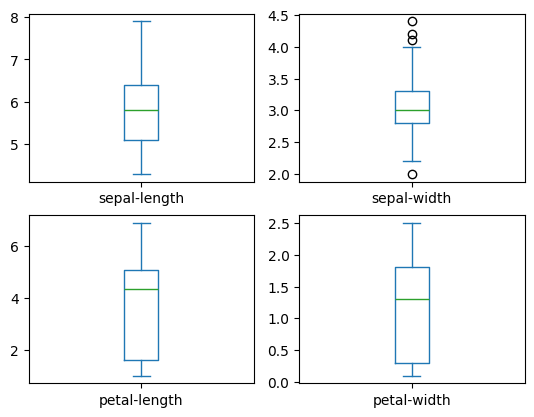

In [59]:
# create a box and whisket plot for the data
df.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False)
pyplot.show()

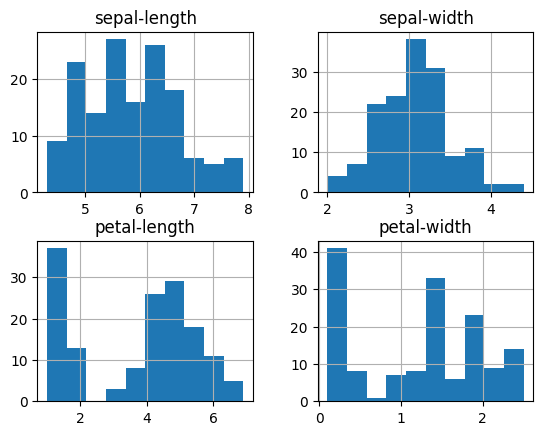

In [60]:
# create a histogram of the data
df.hist()
pyplot.show()

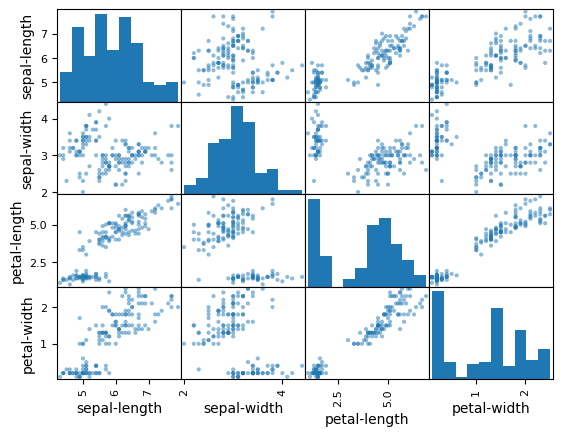

In [61]:
# create a scatter plot matrix of the data
scatter_matrix(df)
pyplot.show()

We need to know that the model we created is good.

Later, we will use statistical methods to estimate the accuracy of the models that we create on unseen data. We also want a more concrete estimate of the accuracy of the best model on unseen data by evaluating it on actual unseen data.

That is, we are going to hold back some data that the algorithms will not get to see and we will use this data to get a second and independent idea of how accurate the best model might actually be.

We will split the loaded dataset into two, 80% of which we will use to train, evaluate and select among our models, and 20% that we will hold back as a validation dataset.

In [62]:
# Create arrays for your dataset
# Assign to X and Y
# Create your train test split with a test size of 20%

array = df.values
X = array[:,0:4]
Y = array[:,4]
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=0.20, random_state=1)

We don’t know which algorithms would be good on this problem or what configurations to use.

We get an idea from the plots that some of the classes are partially linearly separable in some dimensions, so we are expecting generally good results.

Let’s test 6 different algorithms:

* Logistic Regression (LR)
* Linear Discriminant Analysis (LDA)
* K-Nearest Neighbors (KNN).
* Classification and Regression Trees (CART).
* Gaussian Naive Bayes (NB).
* Support Vector Machines (SVM).
* This is a good mixture of simple linear (LR and LDA), nonlinear (KNN, CART, NB and SVM) algorithms.

Let’s build and evaluate our models:

In [63]:
# Try Spot checking all your models for yourself
# make models variable
# append models above
# evaluate each model's results using a for loop
# you should consider kfold and cross val score in this loop
# print results

models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))
results = []
names = []


for name, model in models:
 kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
 cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
 results.append(cv_results)
 names.append(name)
 print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

LR: 0.941667 (0.065085)
LDA: 0.975000 (0.038188)
KNN: 0.958333 (0.041667)
CART: 0.958333 (0.041667)
NB: 0.950000 (0.055277)
SVM: 0.983333 (0.033333)


# Hiding Code**

In [64]:
# Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))
# evaluate each model in turn
results = []
names = []
for name, model in models:
 kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
 cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
 results.append(cv_results)
 names.append(name)
 print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

LR: 0.941667 (0.065085)
LDA: 0.975000 (0.038188)
KNN: 0.958333 (0.041667)
CART: 0.933333 (0.050000)
NB: 0.950000 (0.055277)
SVM: 0.983333 (0.033333)


# **Selecting the Best Model and Continuing Project**

Spoiler your data should support using Support Vector Machines.

We can also create a plot of the model evaluation results and compare the spread and the mean accuracy of each model. There is a population of accuracy measures for each algorithm because each algorithm was evaluated 10 times (via 10 fold-cross validation).

A useful way to compare the samples of results for each algorithm is to create a box and whisker plot for each distribution and compare the distributions.

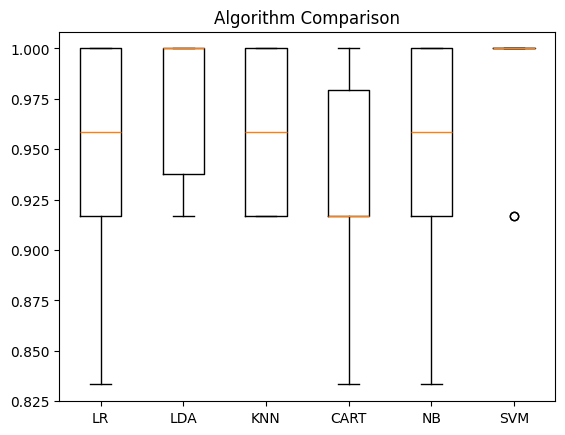

In [71]:
# Create a box and whisket plot that compares algorithms
# it should mimic the one below. Including title.
# change some colors for pop
pyplot.boxplot(results, labels=names)
pyplot.title('Algorithm Comparison')
pyplot.show()

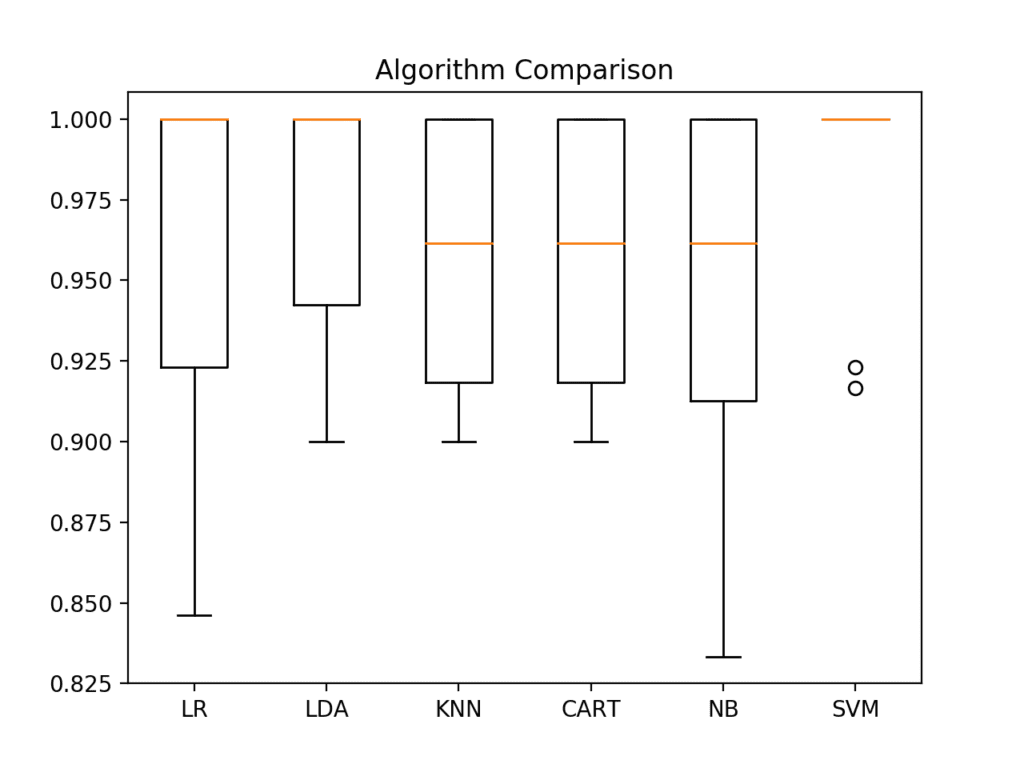

In [66]:
# make some predictions using your model
# make predictions on the validation set

model = SVC(gamma='auto')
model.fit(X_train, Y_train)
predictions = model.predict(X_validation)

0.9666666666666667
[[11  0  0]
 [ 0 12  1]
 [ 0  0  6]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      0.92      0.96        13
 Iris-virginica       0.86      1.00      0.92         6

       accuracy                           0.97        30
      macro avg       0.95      0.97      0.96        30
   weighted avg       0.97      0.97      0.97        30



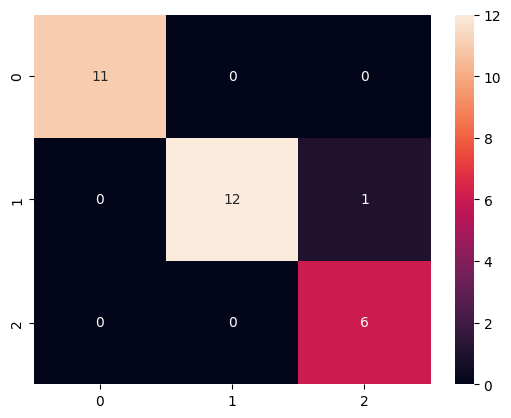

In [67]:
# Evaluate your predictions
# use accuracy score
# confusion matrix
# classification report


print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
sns.heatmap(confusion_matrix(Y_validation, predictions), annot=True)
print(classification_report(Y_validation, predictions))